# Time Series

In [1]:
%run helper.py

## Line Charts

In [2]:
df = sns.load_dataset("dowjones")
df.head(5)

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


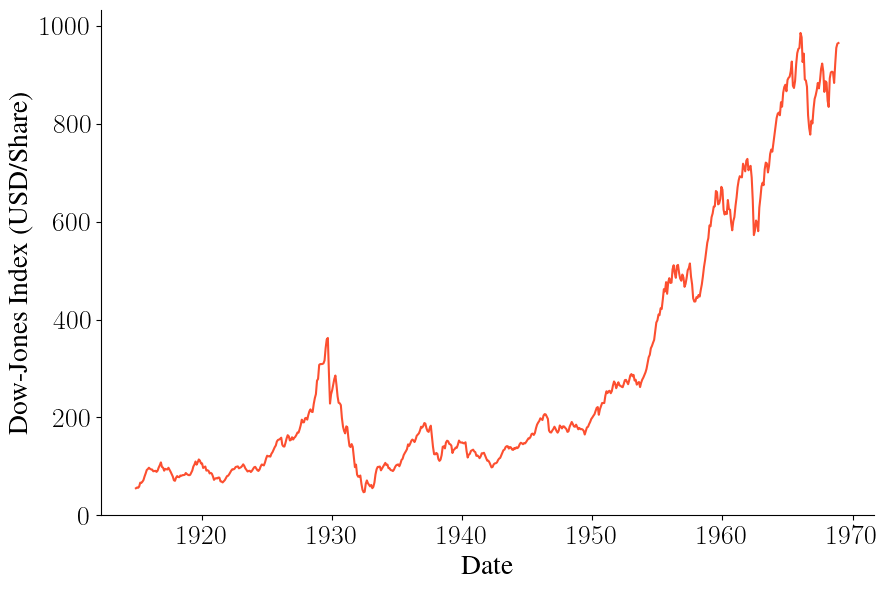

In [3]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(df, x="Date", y="Price", ax=ax, color=cc.glasbey_hv[1])
sns.despine(fig)
ax.set_xlabel("Date")
ax.set_ylabel("Dow-Jones Index (USD/Share)")
plt.tight_layout()
plt.savefig(f"../figures/timeseries_line-dowjones.pdf", bbox_inches="tight", transparent=True)

## Alternatives to Line Charts

In [4]:
df = pd.read_csv("../data/../data/election-results_statistics-finland.csv"
                ).query("Sex == 'Total'"
).rename(columns={"Votes cast (number)":"Votes", "Constituency and municipality in the election year":"Constituency"}
        ).query("Votes != '.' and Constituency == 'Whole country'")
df["Votes"] = df.Votes.astype(int)
df.groupby("Year").agg(dict(Votes="sum"))

,Votes
Year,
1983,2897712
1987,2664192
1991,2631577
1995,2616239
1999,2570062
2003,2745425
2007,2727572
2011,2908057
2015,2941579


### Problem: Intermediate values should not be interpolated $\to$ Line chart inadequate

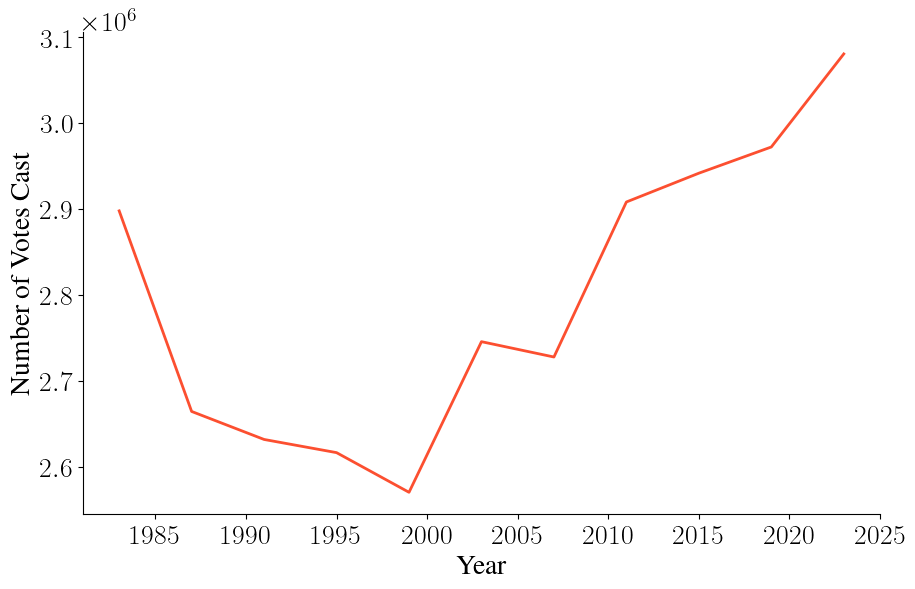

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(df.groupby("Year").agg(dict(Votes="sum")), x="Year", y="Votes", lw=2, 
             ax=ax, color=cc.glasbey_hv[1])
ax.set_ylabel("Number of Votes Cast")
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_line-elections_finland.pdf", bbox_inches="tight", transparent=True)

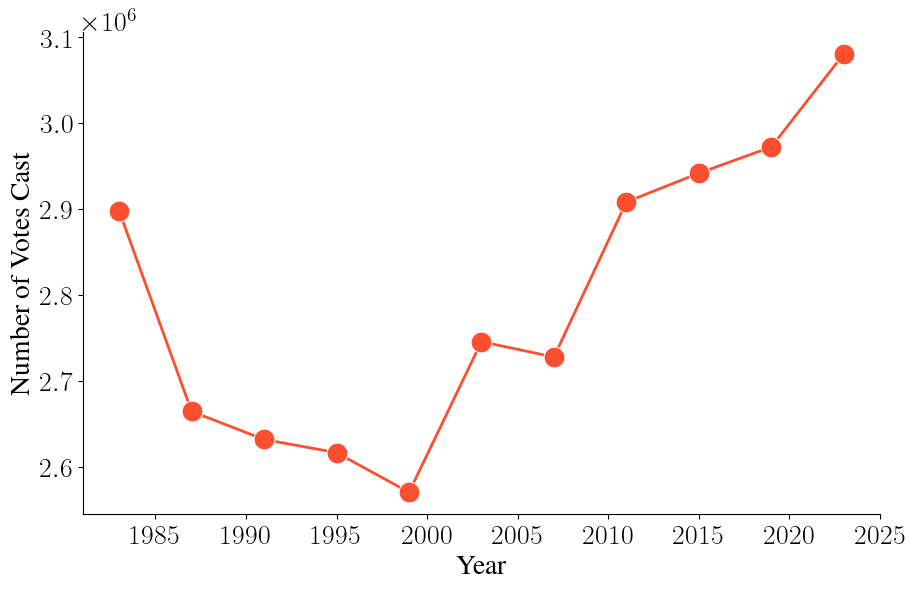

In [6]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(df.groupby("Year").agg(dict(Votes="sum")), x="Year", y="Votes", lw=2, 
             ax=ax, color=cc.glasbey_hv[1], marker="o", markersize=15)
ax.set_ylabel("Number of Votes Cast")
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_line-elections_finland_with-dots.pdf", bbox_inches="tight", transparent=True)

### Problem: Large nonzero baseline with small variation on top of that baseline $\to$ Bar chart inadequate

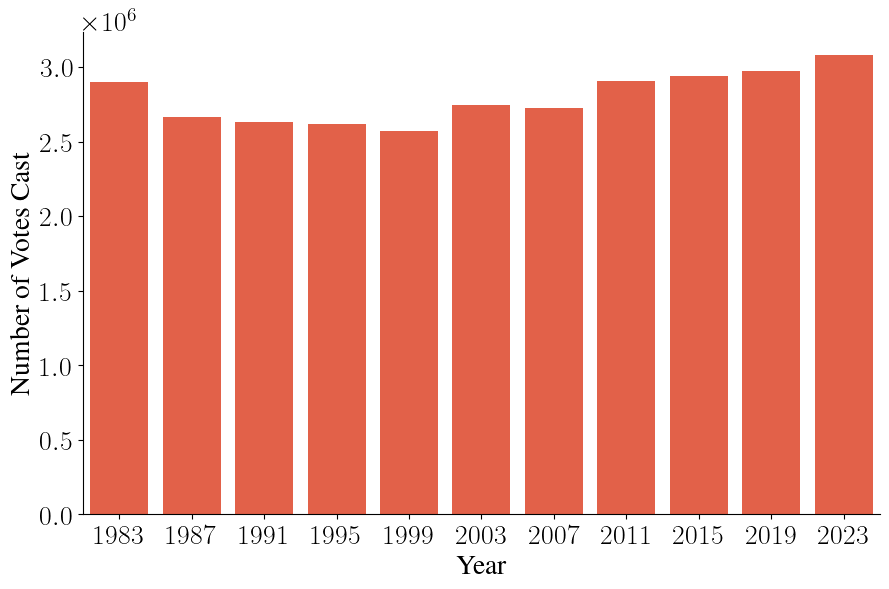

In [7]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(df.groupby("Year").agg(dict(Votes="sum")), x="Year", y="Votes", ax=ax, color=cc.glasbey_hv[1])
ax.set_ylabel("Number of Votes Cast")
ax.set_xticks(ax.get_xticks(), [rf"${x}$" for x in range(1983,2024,4)])
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_bar-elections_finland.pdf", bbox_inches="tight", transparent=True)

### Option: Dot plot (does not require zero baseline + does not suggest interpolation)

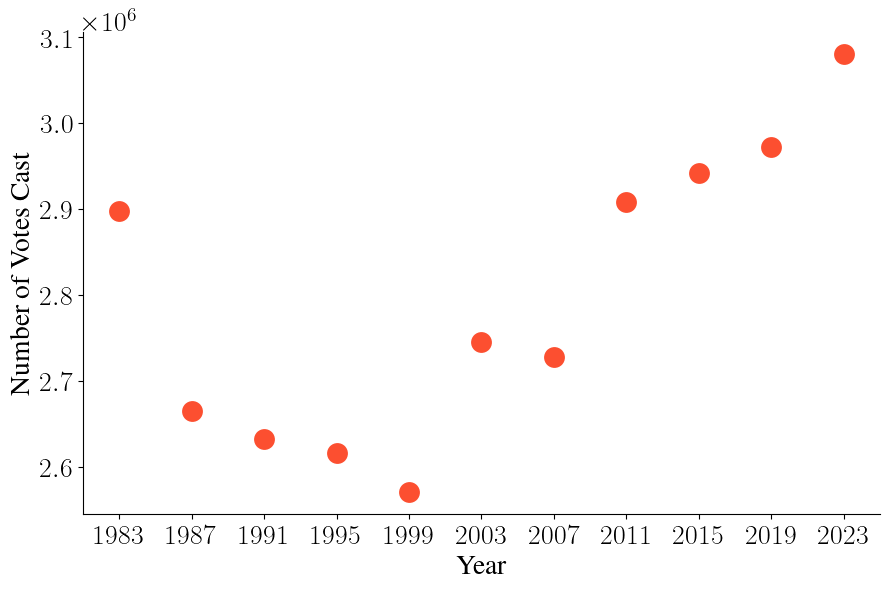

In [8]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.stripplot(df.groupby("Year").agg(dict(Votes="sum")), x="Year", y="Votes", s=15, ax=ax, color=cc.glasbey_hv[1])
ax.set_ylabel("Number of Votes Cast")
ax.set_xticks(ax.get_xticks(), [rf"${x}$" for x in range(1983,2024,4)])
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_dot-elections_finland.pdf", bbox_inches="tight", transparent=True)

### Bars over time

In [9]:
selected = ["KOK", "PS", "SDP"]
vote_differences = df.query("Year >= 2000 and Party in @selected").pivot(index=["Year"], columns=["Party"], values=["Votes"]).diff().dropna()

In [10]:
vote_df = vote_differences.T.reset_index().set_index("Party").T.drop(index="level_0").reset_index().melt(id_vars="Year")
vote_df.head(1)

,Year,Party,value
0,2007,KOK,98937.0


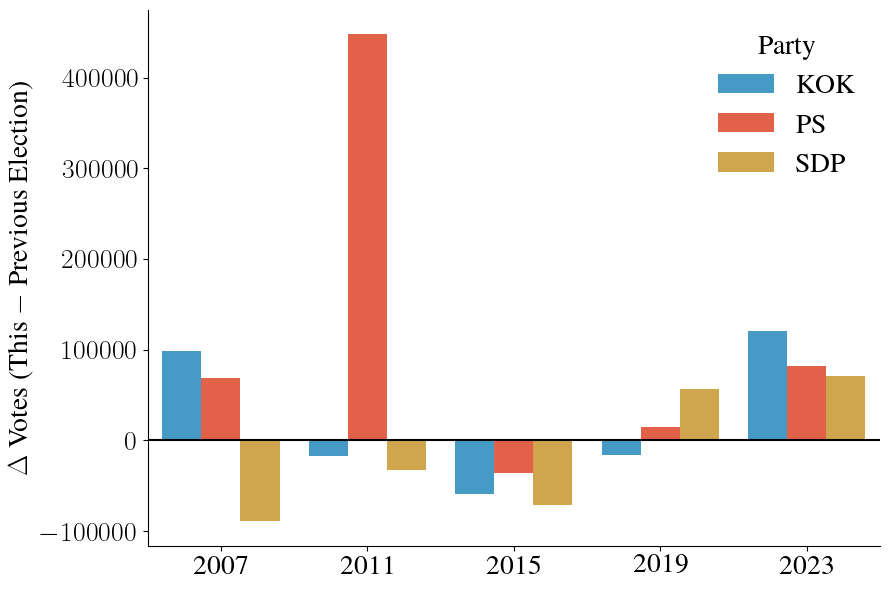

In [11]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(vote_df, x="Year", y="value", hue="Party", ax=ax, palette=cc.glasbey_hv[:3])
ax.hlines(0, xmin=-0.5, xmax=4.5, color="k")
ax.set_xlim(-0.5,4.5)
ax.set_ylabel(r"$\Delta$ Votes (This $-$ Previous Election)")
ax.set_xlabel("")
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_bars-elections_finland.pdf", bbox_inches="tight", transparent=True)

## Box plots as time series

In [12]:
df = pd.read_csv("../data/weather-helsinki-lighthouse_fmi.csv")
df["Month_adj"] = df.Month - 1
df["Date"] = [pd.to_datetime(f"{y}-{m:02}-{d:02}") for y,m,d in zip(df.Year, df.Month, df.Day)]
df.head(1)

,Observation station,Year,Month,Day,Time [Local time],Average temperature [°C],Month_adj,Date
0,Helsinki lighthouse,2003,7,17,03:00,19.7,6,2003-07-17


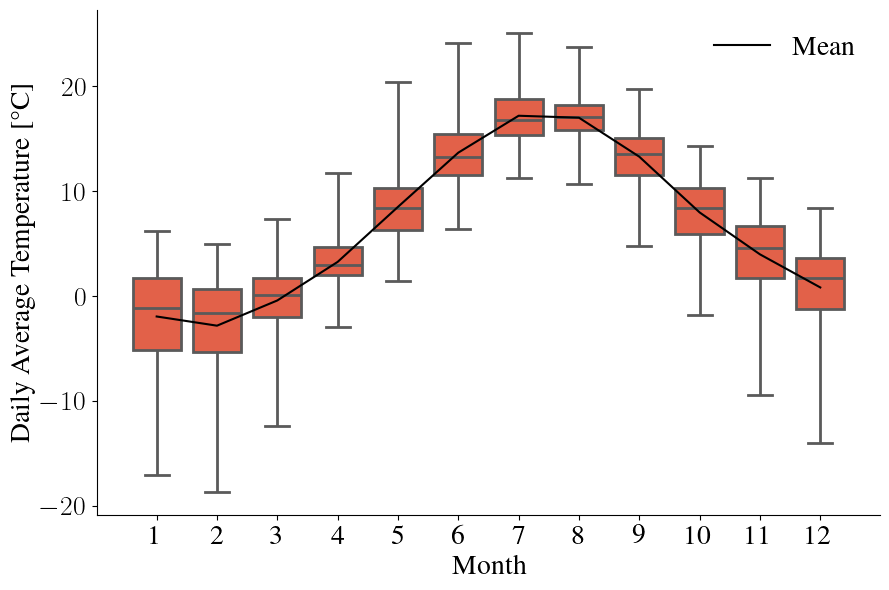

In [13]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.boxplot(df, x="Month", y="Average temperature [°C]", whis=(0,100), ax=ax, color=cc.glasbey_hv[1], linewidth=2)
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="mean", errorbar=None, ax=ax, color="k",
             zorder=100, label="Mean")
sns.despine(fig)
ax.set_ylabel("Daily Average Temperature [°C]")
plt.tight_layout()
plt.savefig(f"../figures/timeseries_box-weather_helsinki.pdf", bbox_inches="tight", transparent=True)

### Reference ranges for orientation

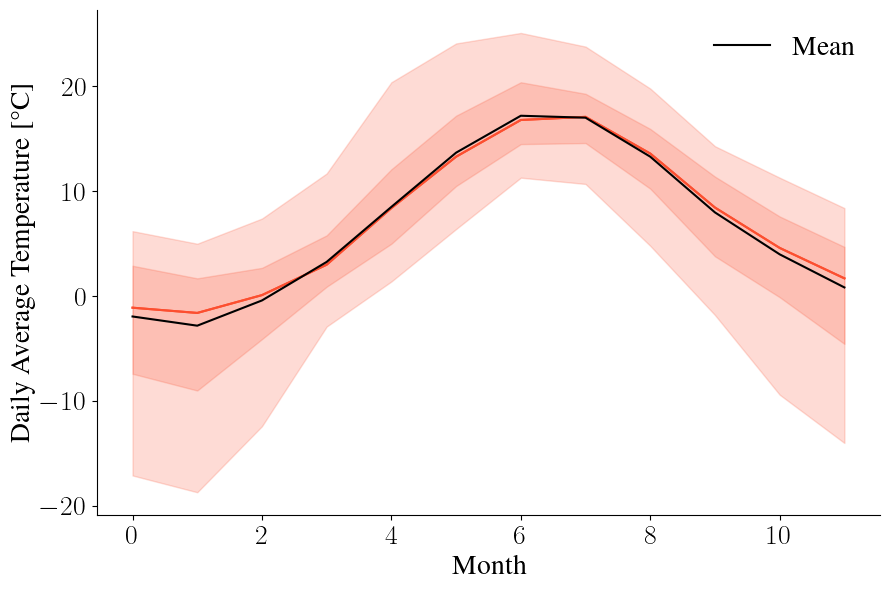

In [14]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="median", 
             errorbar=("pi",75), ax=ax, color=cc.glasbey_hv[1])
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="median", 
             errorbar=("pi",100), ax=ax, color=cc.glasbey_hv[1])
sns.lineplot(df, x="Month_adj", y="Average temperature [°C]", estimator="mean", errorbar=None, ax=ax, color="k",
             zorder=100, label="Mean")
sns.despine(fig)
ax.set_ylabel("Daily Average Temperature [°C]")
ax.set_xlabel("Month")
plt.tight_layout()
plt.savefig(f"../figures/timeseries_line-weather_helsinki.pdf", bbox_inches="tight", transparent=True)

### Small multiples

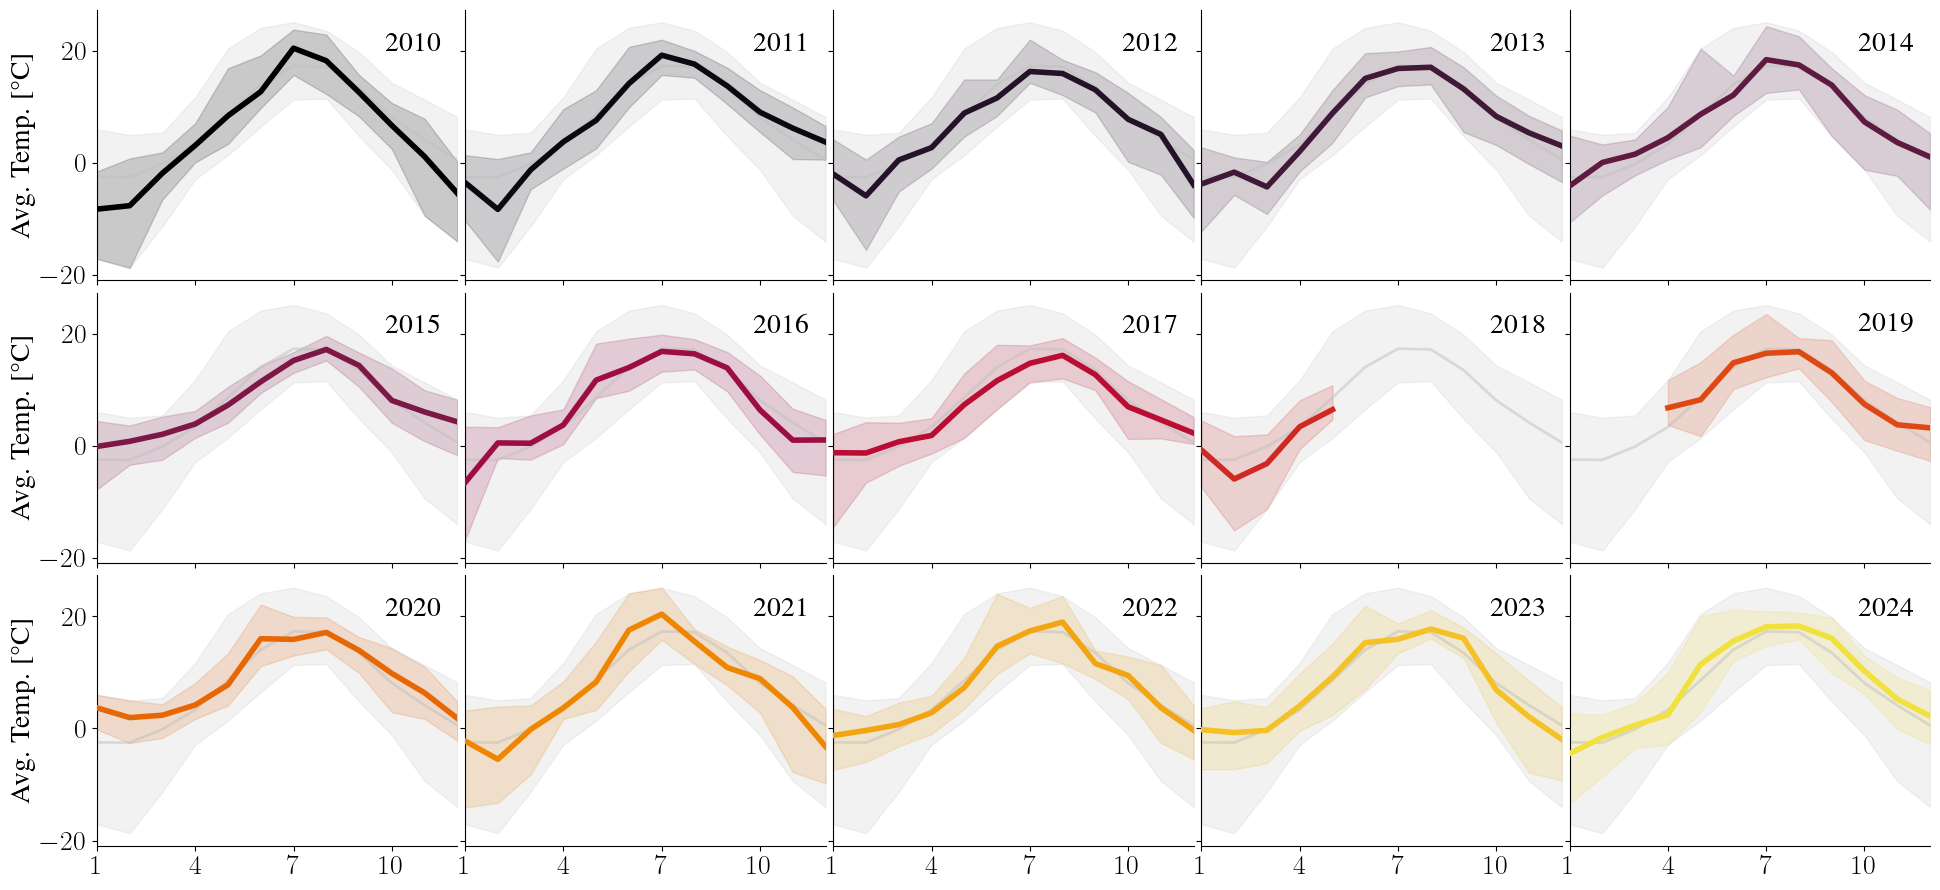

In [15]:
g = sns.relplot(
    data=df.query("2010 <= Year < 2025"),
    x="Month", y="Average temperature [°C]", col="Year", hue="Year",
    kind="line",palette=cmr.ember, linewidth=4, zorder=5,
    col_wrap=5, height=3, aspect=1.3, legend=False,estimator="mean",errorbar=("pi",100), 
)

for year, ax in g.axes_dict.items():
    ax.text(.8, .85, year, transform=ax.transAxes, fontsize=20)

    sns.lineplot(
        data=df.query("2010 <= Year < 2025"), x="Month", y="Average temperature [°C]", 
        estimator="mean",
        errorbar=("pi",100), color="silver", linewidth=2, ax=ax, legend=False, alpha=0.5
    )

    ax.set_xticks([1,4,7,10])
    ax.set_xlim(1,12)

g.set_titles("")

g.set_axis_labels("", "Avg. Temp. [°C]")
g.tight_layout(w_pad=0.1, h_pad=0.1)
g.savefig(f"../figures/timeseries_split-weather_helsinki.pdf", bbox_inches="tight", transparent=True)

### Series of grouped bars

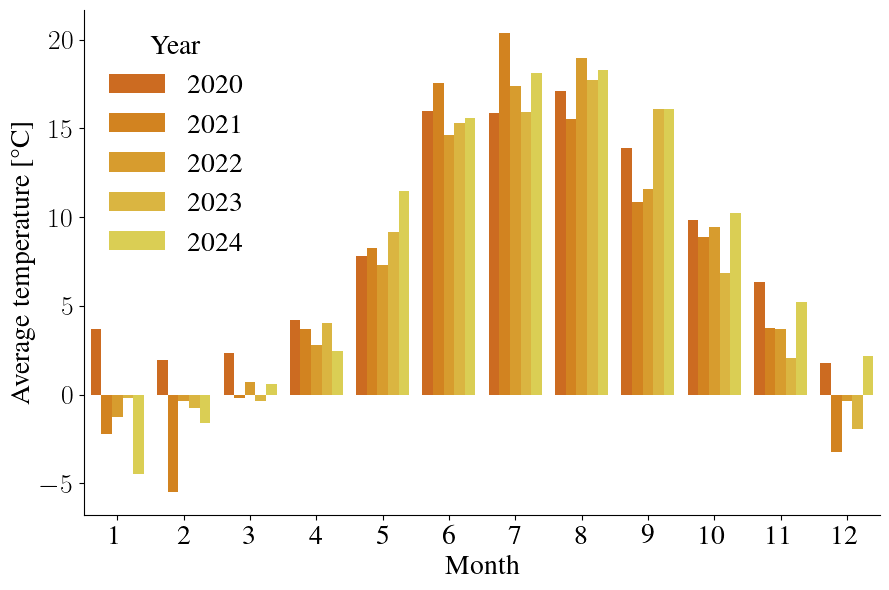

In [16]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.barplot(df.query("2020 <= Year < 2025"), x="Month", y="Average temperature [°C]", 
            hue="Year", palette=cmr.ember.resampled(15).colors[10:].tolist(), 
            estimator="mean", errorbar=None, ax=ax)
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_bars-weather_helsinki.pdf", bbox_inches="tight", transparent=True)

### Boxes as elements

In [17]:
from matplotlib.lines import Line2D

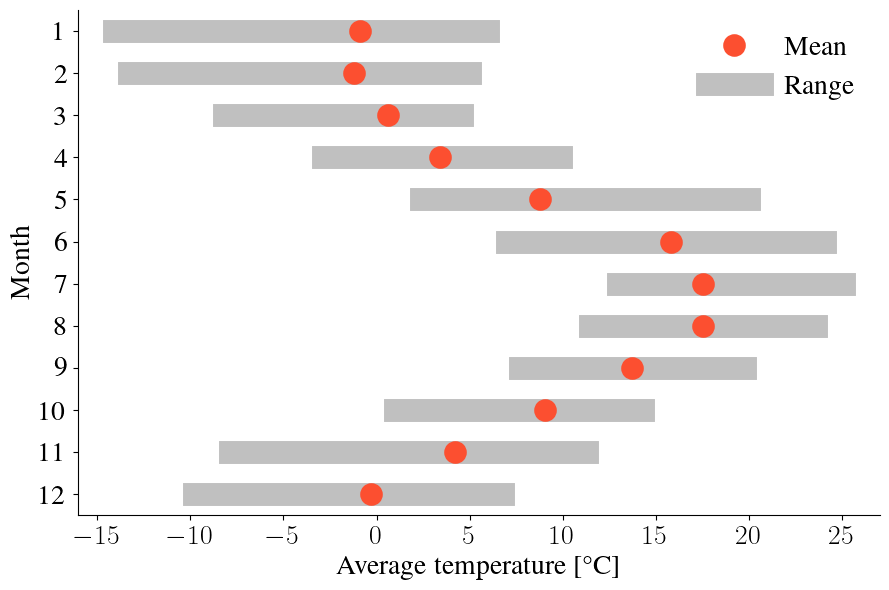

In [18]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
sns.pointplot(df.query("2020 <= Year < 2025"), y="Month", x="Average temperature [°C]", orient="h",
         estimator="mean", errorbar=("pi",100), err_kws=dict(lw=16.5, color="silver"), lw=0, 
             )
sns.pointplot(df.query("2020 <= Year < 2025"), y="Month", x="Average temperature [°C]", orient="h",
         estimator="mean", errorbar=None, lw=5, linestyle="none", color=cc.glasbey_hv[1], marker="o", label="Mean"
             )
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles + [Line2D((0,1),(0,1),linewidth=16.5, color="silver")], labels=labels+["Range"])
sns.despine(fig)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_boxes-weather_helsinki.pdf", bbox_inches="tight", transparent=True)

### Superimposition vs. small multiples

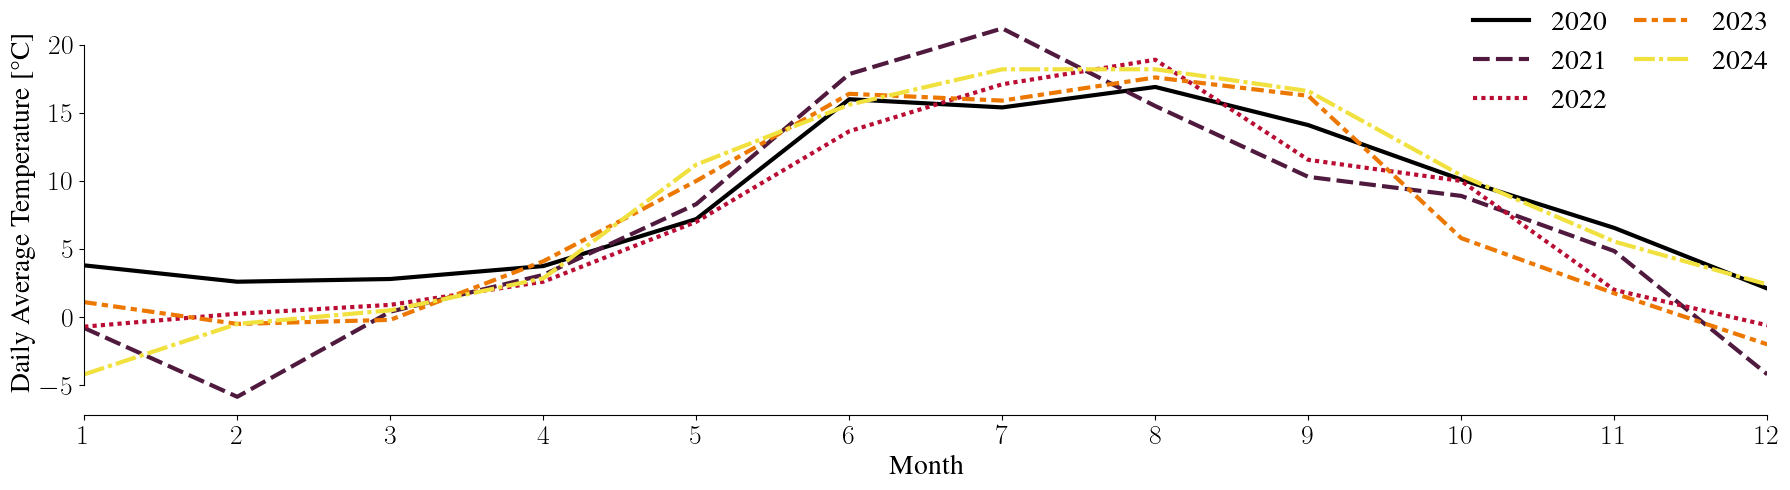

In [19]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
sns.lineplot(df.query("2020 <= Year < 2025"), x="Month", y="Average temperature [°C]", estimator="median", 
             errorbar=None, ax=ax, palette=cmr.ember.resampled(5).colors.tolist(), hue="Year", lw=3, 
             style="Year"
            )
ax.set_xticks(range(1,13))
ax.set_xlim(1,12)
ax.set_ylabel("Daily Average Temperature [°C]")
ax.set_xlabel("Month")
ax.legend(title="", ncol=2, loc="upper right", columnspacing=1, borderaxespad=0, borderpad=0)
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_lines-weather_helsinki.pdf", bbox_inches="tight", transparent=True)

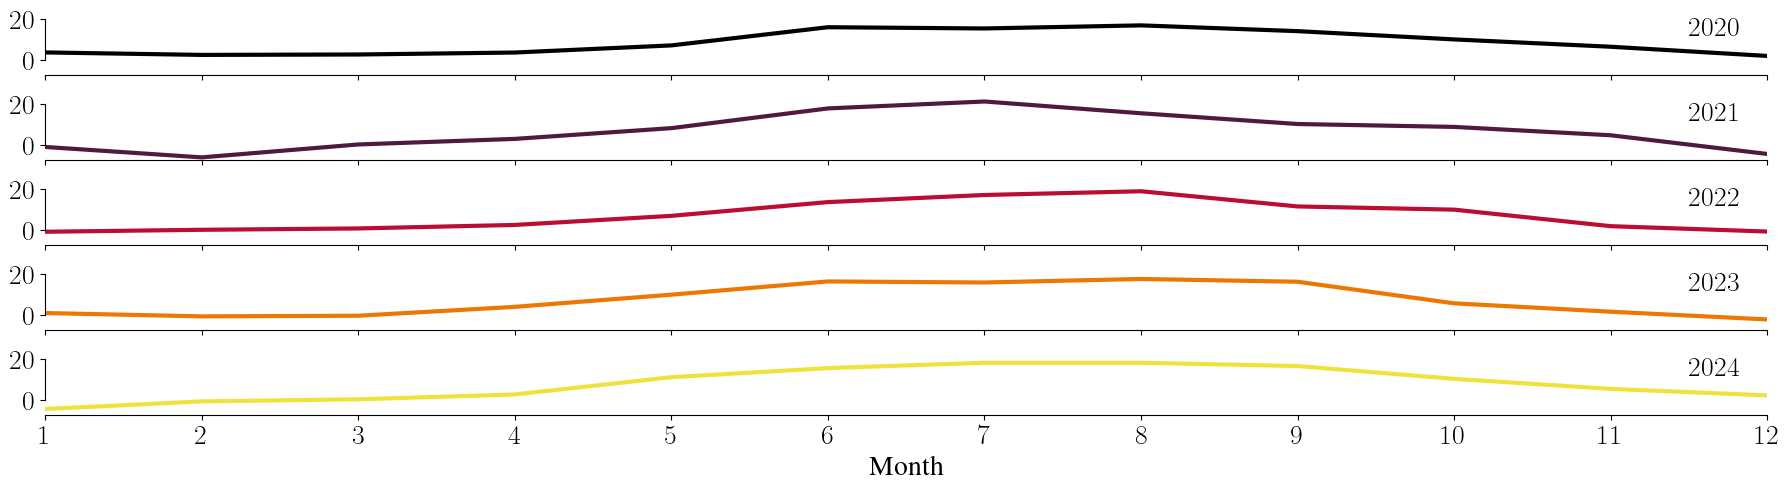

In [20]:
fig, ax = plt.subplots(5,1,figsize=(18,5), sharex=True, sharey=True)
for idx,year in enumerate(range(2020, 2025)):
    sns.lineplot(df.query("Year == @year"), x="Month", y="Average temperature [°C]", estimator="median", 
                 errorbar=None, ax=ax[idx], palette=cmr.ember.resampled(5).colors.tolist()[idx:idx+1], hue="Year", lw=3, 
                 style="Year", legend=False
                )
    ax[idx].annotate(f"${year}$", xy=(11.5,12), fontsize=20)
    ax[idx].set_ylabel("")
ax[-1].set_xticks(range(1,13))
ax[-1].set_xlim(1,12)
ax[-1].set_xlabel("Month")
sns.despine(fig, trim=True)
plt.tight_layout()
plt.savefig(f"../figures/timeseries_lines_separated-weather_helsinki.pdf", bbox_inches="tight", transparent=True)